<!-- !pip install lazypredict -->

### **Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display
import lazypredict
from lazypredict.Supervised import LazyClassifier


### **Loading the data set**

In [2]:
df = pd.read_csv('../datasets/EPHx2_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('class', axis=1)
Y = df["class"]

### **Data pre-processing**

In [4]:
# Examine X dimension
X.shape

(2886, 881)

## Removing Low Variance Features (Feature Selection)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2886, 123)

### Can see above that by removal of low variance features only 123 net columns are left to be analysed

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## **Compare ML algorithms**

In [7]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 87%|████████▋ | 27/31 [00:07<00:01,  3.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 2020, number of used features: 123
[LightGBM] [Info] Start training from score -0.224382
[LightGBM] [Info] Start training from score -2.406846
[LightGBM] [Info] Start training from score -2.199207


100%|██████████| 31/31 [00:08<00:00,  3.66it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 87%|████████▋ | 27/31 [00:05<00:00,  4.46it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 2020, number of used features: 123
[LightGBM] [Info] Start training from score -0.224382
[LightGBM] [Info] Start training from score -2.406846
[LightGBM] [Info] Start training from score -2.199207


100%|██████████| 31/31 [00:07<00:00,  4.28it/s]


In [14]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.91,None,0.96,0.35
DecisionTreeClassifier,0.97,0.90,None,0.96,0.06
ExtraTreeClassifier,0.97,0.90,None,0.96,0.04
ExtraTreesClassifier,0.97,0.90,None,0.96,0.38
LabelPropagation,0.97,0.90,None,0.96,0.27
LabelSpreading,0.97,0.90,None,0.96,0.18
LGBMClassifier,0.96,0.89,None,0.96,1.41
BaggingClassifier,0.96,0.88,None,0.95,0.18
KNeighborsClassifier,0.87,0.61,None,0.85,0.11


In [8]:
# Performance table of the training set (70% subset)
predictions_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.91,None,0.96,0.35
DecisionTreeClassifier,0.97,0.90,None,0.96,0.06
ExtraTreeClassifier,0.97,0.90,None,0.96,0.04
ExtraTreesClassifier,0.97,0.90,None,0.96,0.38
LabelPropagation,0.97,0.90,None,0.96,0.27
LabelSpreading,0.97,0.90,None,0.96,0.18
LGBMClassifier,0.96,0.89,None,0.96,1.41
BaggingClassifier,0.96,0.88,None,0.95,0.18
KNeighborsClassifier,0.87,0.61,None,0.85,0.11


In [9]:
# Performance table of the test set (30% subset)
predictions_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.85,0.57,None,0.84,0.36
RandomForestClassifier,0.85,0.56,None,0.83,0.33
DecisionTreeClassifier,0.82,0.56,None,0.82,0.05
LabelPropagation,0.85,0.55,None,0.83,0.10
LabelSpreading,0.85,0.55,None,0.83,0.12
BaggingClassifier,0.84,0.54,None,0.83,0.16
Perceptron,0.81,0.54,None,0.80,0.05
LGBMClassifier,0.84,0.53,None,0.82,1.38
ExtraTreeClassifier,0.82,0.53,None,0.81,0.03


In [10]:
print(models_train)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RandomForestClassifier             0.97               0.91    None      0.96   
DecisionTreeClassifier             0.97               0.90    None      0.96   
ExtraTreeClassifier                0.97               0.90    None      0.96   
ExtraTreesClassifier               0.97               0.90    None      0.96   
LabelPropagation                   0.97               0.90    None      0.96   
LabelSpreading                     0.97               0.90    None      0.96   
LGBMClassifier                     0.96               0.89    None      0.96   
BaggingClassifier                  0.96               0.88    None      0.95   
KNeighborsClassifier               0.87               0.61    None      0.85   
SGDClassifier                      0.84               0.61    None      0.83   
QuadraticDiscriminantAnalysis      0.22 

## **Data visualization of model performance**

[(0.0, 1.0)]

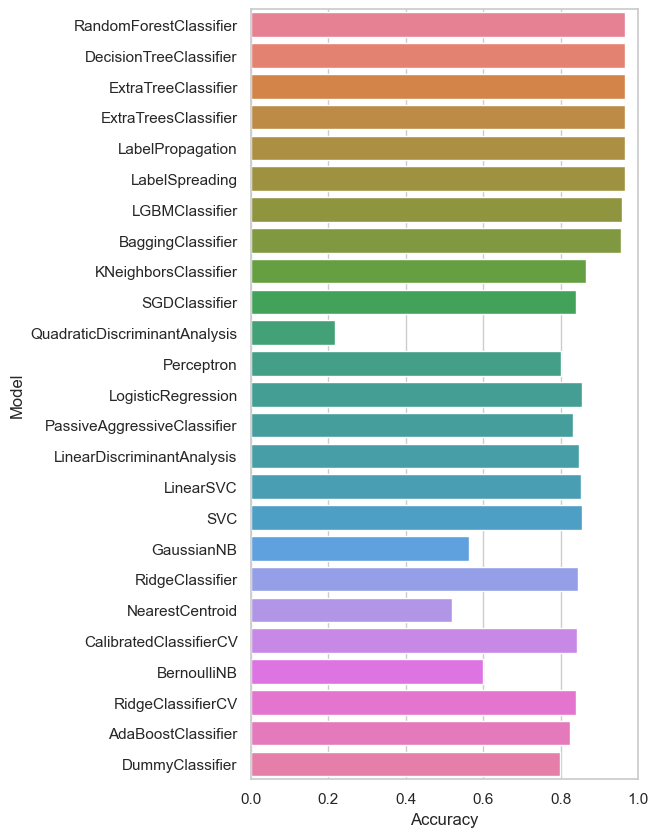

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index,palette="husl", x="Accuracy",data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

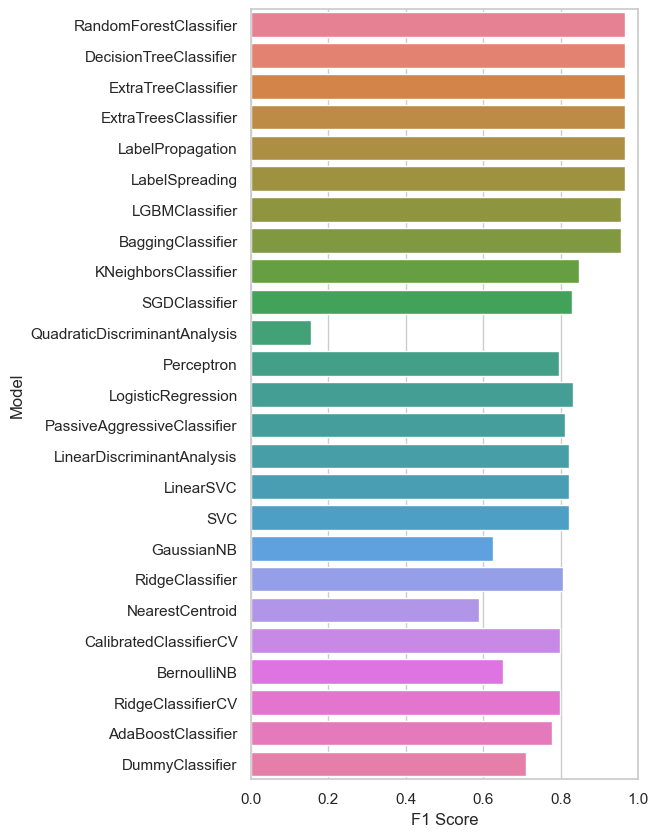

In [18]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, palette="husl", x="F1 Score", data=predictions_train)
ax.set(xlim=(0, 1)) 